# Notebook to test the natural language processing of the Data
Try to use the NLTK library


In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.draw.dispersion import dispersion_plot
from nltk.probability import FreqDist
import nltk
# nltk.download()


In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [30]:
raw_data_folder = './data/raw_data/' 
characters_header_name = ['movie_wiki_id','freebase_movie_id','movie_release_date', 'character_name', 'birth', 'gender', 'height', 'ethnicity', 'name', 'release_age', 'freebase_character_map_id', 'freebase_character_id', 'freebase_actor_id']
movies_header_name = ['wiki_id', 'freebase_id', 'name', 'release_date', 'revenue', 'runtime', 'languages', 'country', 'genres']


characters_df = pd.read_csv( raw_data_folder + 'character.metadata.tsv', sep = '\t', names = characters_header_name)
movies_df = pd.read_csv( raw_data_folder + 'movie.metadata.tsv', sep = '\t', names= movies_header_name, index_col= 'wiki_id' )

characters_df.head(5)

,movie_wiki_id,freebase_movie_id,movie_release_date,character_name,birth,gender,height,ethnicity,name,release_age,freebase_character_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [31]:
summaries = pd.read_csv(raw_data_folder+'plot_summaries.txt', sep='\t', index_col=0,  names=['index', 'summary'])

In [32]:
# Try to load all of the summaries into one large text, then plot occurance of certain words
# -> Then could split certain parts of the dataset to see how the occurance of the different words varies between subsets

all_summaries = summaries['summary'].str.cat(sep=' ')

In [33]:
all_summaries_tokens = word_tokenize(all_summaries)

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

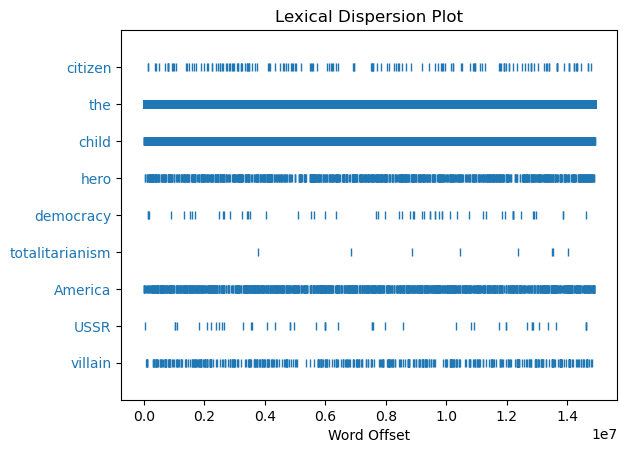

In [34]:
dispersion_plot(all_summaries_tokens, ["citizen", "the", "child", "hero", "democracy", "totalitarianism", "America", "USSR", "villain"])

In [35]:
# Count the vocabulary in all of the summaries
len(all_summaries_tokens)


14906094

In [36]:
sorted(set(all_summaries_tokens))


['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'-",
 "'.Stockdale",
 "'007",
 "'05",
 "'06",
 "'10",
 "'1001",
 "'11",
 "'12",
 "'15",
 "'150",
 "'2047",
 "'20s",
 "'242",
 "'28",
 "'29",
 "'30",
 "'30s",
 "'36",
 "'3rd",
 "'40s",
 "'44",
 "'49er",
 "'50s",
 "'50s-style",
 "'50s-themed",
 "'52",
 "'53",
 "'55",
 "'57",
 "'59",
 "'60-foot",
 "'60s",
 "'62",
 "'64",
 "'68",
 "'69",
 "'70",
 "'70s",
 "'71",
 "'72",
 "'73",
 "'74",
 "'76",
 "'78",
 "'79",
 "'80",
 "'80s",
 "'82",
 "'83",
 "'86",
 "'88",
 "'89",
 "'8And",
 "'90s",
 "'93",
 "'94",
 "'96",
 "'97",
 "'AJAX",
 "'ALL",
 "'AUSTRALIAN",
 "'Abduction",
 "'Abhiraam",
 "'Abhishek",
 "'About",
 "'Ace",
 "'Acqui",
 "'Act",
 "'Action",
 "'Actually",
 "'Admiral",
 "'African",
 "'Agneepath",
 "'Agreement",
 "'Ah",
 "'Ajantrik",
 "'Akky",
 "'Albert",
 "'Alex",
 "'All",
 "'Allah",
 "'Allan",
 "'Allied",
 "'Allo",
 "'Alpha",
 "'Aluf",
 "'Aman",
 "'Ambrose",
 "'Amen",
 "'America",
 "'American",
 "'Amigo",
 "'Amma",
 "'Amu",
 "'Amudha",
 "'An",


In [37]:
len(set(all_summaries_tokens))

200078

In [38]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

lexical_diversity(all_summaries_tokens)

0.013422563952702833

In [39]:
fdist1 = FreqDist(all_summaries_tokens)
print(fdist1) 
fdist1.most_common(50)

<FreqDist with 200078 samples and 14906094 outcomes>


[(',', 787499),
 ('the', 737269),
 ('.', 653591),
 ('to', 478179),
 ('and', 455448),
 ('a', 362327),
 ('of', 261143),
 ('is', 225192),
 ('in', 201065),
 ('his', 190735),
 ('her', 148057),
 ("'s", 145444),
 ('he', 139299),
 ('that', 137154),
 ('with', 134842),
 ('him', 96806),
 ('for', 93667),
 ('by', 91210),
 ('The', 87178),
 ('on', 77453),
 ('as', 74350),
 ('she', 72724),
 ('who', 71059),
 ('but', 64133),
 ('from', 60008),
 ('has', 56924),
 ('they', 56555),
 ('an', 55821),
 ('at', 54569),
 ('their', 51624),
 ('are', 51119),
 ('it', 47370),
 ('out', 42363),
 ('``', 41789),
 ("''", 41170),
 ('He', 41003),
 ('into', 39337),
 ('up', 38235),
 ('them', 35712),
 ('be', 35084),
 ('was', 33810),
 ('not', 33317),
 ('when', 29864),
 ('which', 27374),
 ('then', 27358),
 ('after', 25707),
 ('one', 25508),
 ('about', 25504),
 ('have', 23910),
 ('back', 22746)]

In [40]:
# Trying to categorize the words in the summaries

nltk.pos_tag(all_summaries_tokens) # categorize words based on their gramatical purpose in the sentence. (eg RB     -> adverbs)

[('Shlykov', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('hard-working', 'JJ'),
 ('taxi', 'NN'),
 ('driver', 'NN'),
 ('and', 'CC'),
 ('Lyosha', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('saxophonist', 'NN'),
 (',', ','),
 ('develop', 'VB'),
 ('a', 'DT'),
 ('bizarre', 'JJ'),
 ('love-hate', 'NN'),
 ('relationship', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('despite', 'IN'),
 ('their', 'PRP$'),
 ('prejudices', 'NNS'),
 (',', ','),
 ('realize', 'VBP'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ("n't", 'RB'),
 ('so', 'RB'),
 ('different', 'JJ'),
 ('after', 'IN'),
 ('all', 'DT'),
 ('.', '.'),
 ('The', 'DT'),
 ('nation', 'NN'),
 ('of', 'IN'),
 ('Panem', 'NNP'),
 ('consists', 'VBZ'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('wealthy', 'JJ'),
 ('Capitol', 'NNP'),
 ('and', 'CC'),
 ('twelve', 'VB'),
 ('poorer', 'JJR'),
 ('districts', 'NNS'),
 ('.', '.'),
 ('As', 'IN'),
 ('punishment', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('past', 'JJ'),
 ('rebellion', 'NN'),
 (',', ','),
 ('each', 'DT'),
 ('district', 'NN'),
 ('must', 'MD'),
 